#### 라이브러리 Import 하기

In [3]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


#### X and Y data

In [4]:
x_train = [1, 2, 3, 4, 5]
#y_train = [3.1, 5.3, 7.2, 9.5, 11.7] #noise 다르게 주기
#y_train = [2, 4, 6, 8, 10] #2x
y_train = [5.1, 7.2, 9.3, 11.4, 13.5] #y = 2.1x + 3

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise

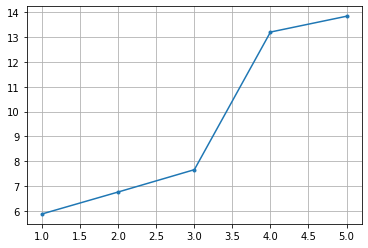

In [5]:
plt.plot(x_train, y_train,'.-')
plt.grid()

#### Initialization

In [6]:
useRandom = False

In [7]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 2.0;
    b0 = 3.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

#### Our hypothesis
$$ H(x)=Wx + b $$

In [9]:
hypothesis = x_train * W + b

#### cost/loss function 정의하기

* loss of one training example :
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2$$

In [10]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

#### Optimizer

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

#### Launch the graph in a session

In [12]:
sess = tf.Session()

#### Initializes global variables in the graph.

In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    w1 = sess.run(W)[0]
    b1 = sess.run(b)[0]
    vloss.append(loss1)
    vw.append(w1)
    vb.append(b1)

    if step % 50 == 0: # 5번마다
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 1.4983656 	 2.0373557 	 3.0093353
50 	 1.3119044 	 2.168983 	 2.999338
100 	 1.3090452 	 2.1790721 	 2.9629135
150 	 1.3070077 	 2.1875896 	 2.9321628
200 	 1.3055552 	 2.1947803 	 2.9062018
250 	 1.3045201 	 2.200851 	 2.8842854
300 	 1.3037826 	 2.2059758 	 2.865783
350 	 1.3032566 	 2.2103024 	 2.8501625
400 	 1.302882 	 2.2139552 	 2.8369753
450 	 1.3026145 	 2.2170389 	 2.8258426
500 	 1.3024244 	 2.2196422 	 2.8164432
550 	 1.3022887 	 2.22184 	 2.8085084
600 	 1.302192 	 2.2236958 	 2.8018086
650 	 1.3021228 	 2.2252624 	 2.7961526
700 	 1.3020741 	 2.2265847 	 2.7913783
750 	 1.3020388 	 2.227701 	 2.787348
800 	 1.302014 	 2.2286437 	 2.7839453
850 	 1.3019962 	 2.2294393 	 2.7810721
900 	 1.3019834 	 2.230111 	 2.7786472
950 	 1.3019745 	 2.2306778 	 2.7766004
1000 	 1.3019682 	 2.2311566 	 2.7748716


Text(0, 0.5, 'loss')

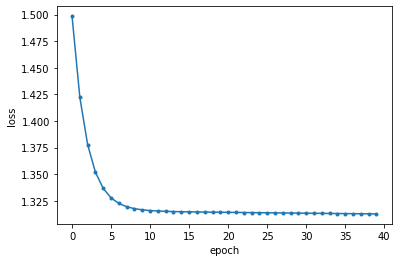

In [15]:
plt.plot(vloss[:40],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

TODO: w, b의 epoch 에 따른 변화 그래프 넣기 !

Text(0, 0.5, 'w1')

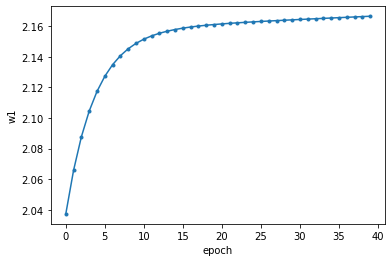

In [17]:
plt.plot(vw[:40],'.-') #변화를 좀 더 살펴보기 위해 갯수를 40개로 늘려서 찍어봄
plt.xlabel('epoch')
plt.ylabel('w1')

Text(0, 0.5, 'b1')

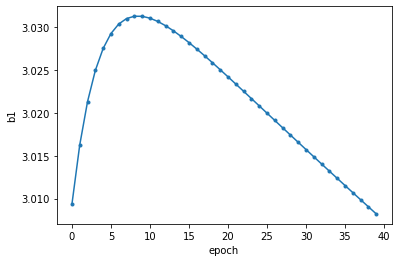

In [18]:
plt.plot(vb[:40],'.-') #변화를 좀 더 살펴보기 위해 갯수를 40개로 늘려서 찍어봄
plt.xlabel('epoch')
plt.ylabel('b1')

#### 학습완료

In [19]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

#### 출력해보기

In [20]:
print(w1, b1)

2.2311566 2.7748716


In [21]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 2.2311566x + 2.7748716


Text(0.5, 1.0, 'y = 2.2311566x + 2.7748716')

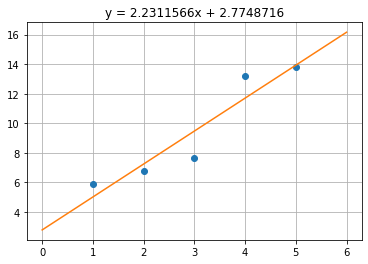

In [22]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)